In [ ]:
# Run this program in Google colab

from google.colab import drive
drive.mount('/content/drive')

# Importing correct directories
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import datetime
import math
from scipy import ndimage
from numpy import newaxis

import os
import cv2
import random
import cv2

# Initial configuration for image parameters
#The number of pixels in each dimension of an image.
img_size = IMG_SIZE = 121

#Tuple with height and width of images used to reshape arrays.

CATEGORIES = ["nebulae", "galaxies", "stars"]
#Number of classes, one class for each of 10 digits.
num_classes = len(CATEGORIES)

#Number of colour channels for the images: 3 channel for rgb.
num_channels = 3


# Creating training and testing sets (type <list>) from directories, and doing data augmentation by rotating images by 90, 180, 270 degrees and flipping on the x and y axes

img_shape = (121, 121, 3)

Mounted at /content/drive


In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def create_dataset(DATADIR):
    dataset= []
    galaxies= 0
    nebulae= 0
    stars= 0
    flag= 0
    count= 0
    count2= 0
    num_augmentations= 6
      
    for category in CATEGORIES:  # do nebulae, galaxies and stars


        path = os.path.join(DATADIR,category)  # create path to nebulae and galaxies and stars
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=nebula 1=galaxy 2=star

        for img in os.listdir(path):  # iterate over each image per nebula and galaxy
          
                print(count)
                count= count+1
            
                img_array=cv2.imread(os.path.join(path,img))
                
                img_array=cv2.resize(img_array, dsize=(121, 121), interpolation=cv2.INTER_CUBIC)


                if(img_array.shape!=img_shape):
                    continue
                else:                  
                    # create all the transformations
                    
                    # 90 degrees rotation
                    img_90 = ndimage.rotate(img_array, 90)
                    
                    # 180 degrees rotation
                    img_180 = ndimage.rotate(img_array, 180)
                    
                    # 270 degrees rotation
                    img_270 = ndimage.rotate(img_array, 270)
                    
                    # flip in up-down (vertial) direction
                    img_v= np.flipud(img_array)
                    
                    # flip in left-right (horizontal) direction
                    img_h= np.fliplr(img_array)                  
                    
                    dataset.append([img_array, class_num])  # add this to our training_data
                    dataset.append([img_90, class_num])  # add 90 degrees rotation to our training_data
                    dataset.append([img_180, class_num])  # add 180 degrees rotation to our training_data
                    dataset.append([img_270, class_num])  # add 270 degrees rotation to our training_data
                    dataset.append([img_v, class_num])  # add vertical flip to our training_data
                    dataset.append([img_h, class_num])  # add horizontal flip to our training_data
                    
                    if class_num==0: # 0 for nebula, 1 for galaxy, 2 for star
                        nebulae= nebulae+num_augmentations
                    elif class_num==1:
                        galaxies= galaxies+num_augmentations
                    else:
                        stars= stars+num_augmentations
        
        if (flag==0 or flag==1):
            flag= flag+1
        else:
            return dataset, nebulae, galaxies, stars


dataset_path= "/content/drive/My Drive/Classification-ML/2MASS/dataset/"
training_set, nebulae, galaxies, stars=create_dataset(dataset_path)
print("DATASET SHAPE:")
print(len(training_set))
print("GALAXY COUNT:")
print(galaxies)
print("NEBULA COUNT:")
print(nebulae)
print("STAR COUNT:")
print(stars)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Streaming output truncated to the last 5000 lines.
i:  14712
i:  14713
i:  14714
i:  14715
i:  14716
i:  14717
i:  14718
i:  14719
i:  14720
i:  14721
i:  14722
i:  14723
i:  14724
i:  14725
i:  14726
i:  14727
i:  14728
i:  14729
i:  14730
i:  14731
i:  14732
i:  14733
i:  14734
i:  14735
i:  14736
i:  14737
i:  14738
i:  14739
i:  14740
i:  14741
i:  14742
i:  14743
i:  14744
i:  14745
i:  14746
i:  14747
i:  14748
i:  14749
i:  14750
i:  14751
i:  14752
i:  14753
i:  14754
i:  14755
i:  14756
i:  14757
i:  14758
i:  14759
i:  14760
i:  14761
i:  14762
i:  14763
i:  14764
i:  14765
i:  14766
i:  14767
i:  14768
i:  14769
i:  14770
i:  14771
i:  14772
i:  14773
i:  14774
i:  14775
i:  14776
i:  14777
i:  14778
i:  14779
i:  14780
i:  14781
i:  14782
i:  14783
i:  14784
i:  14785
i:  14786
i:  14787
i:  14788
i:  14789
i:  14790
i:  14791
i:  14792
i:  14793
i:  14794
i:  14795
i:  14796
i:  14797
i:  14798
i:  14799
i:  14800
i:  14801
i:  14802
i:  14803
i:  14804
i:  14805
i:  14806

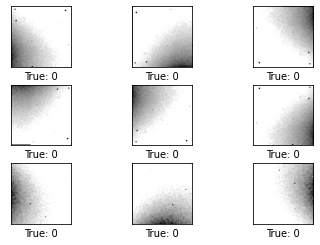

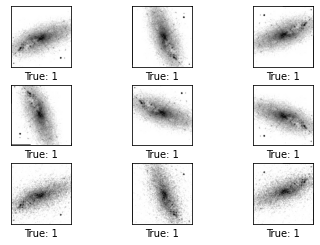

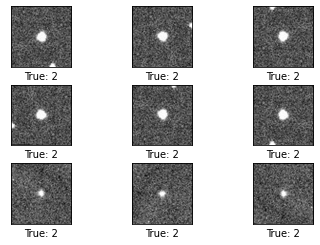

In [ ]:
# Function to separate the images and labels as separate labels from the training/testing sets
def dataset_splitter(dataset):
    images= []
    labels= []
    for entry in dataset:
        images.append(entry[0])
        labels.append(entry[1])
    return images, labels
    print(labels)
    

# Creating image and label <lists>
images, labels= dataset_splitter(training_set)

# Creating correct dimensioned array
new_images= []

i= 0
for each_image in images:
  print("i: ", i)
  tmp_image= each_image[newaxis, :, :, :]
  new_images.append(each_image)
  i += 1

new_images=np.array(new_images)

print("new_images.shape: ", new_images.shape)

new_labels = np.array(labels)


# Re-shaping image dataset to add num_channels, so that it's in the form [number of images, image size, image size, number of channels] instead of [number of images, image size, image size]
#new_images= new_images_1[:, :, :, newaxis]
#print("new_images_1[0]: ", new_images_1[0].shape)
#print("new_images_1: ", new_images_1.shape)
#new_images= new_images_1[:, :, :]


# Creating training and testing sets
random_state=20
#split data into training and test data
from sklearn.model_selection import train_test_split
images_train, images_test, labels_train, labels_test=train_test_split(new_images,new_labels,test_size=0.3,random_state=random_state)
images_train, images_val, labels_train, labels_val=train_test_split(images_train, labels_train, test_size=0.15, random_state=random_state)

print(images_train.shape) # should be in the form [number of images, image size, image size, number of channels]: eg. (32, 28, 28, 1)

# Function to plot sample real and bogus images
def plot_images(images, cls_true, cls_pred=None):

    assert len(images) == len(cls_true)

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    

# Function to produce separate real and bogus training sets (for plotting)
def binary_image_splitter(images, labels):
    galaxy_im= []
    galaxy_l= []
    nebulae_im= []
    nebulae_l= []
    stars_im= []
    stars_l= []
    count= 0
    for entry in labels:
        if entry==0:
            nebulae_im.append(images[count])
            nebulae_l.append(entry)
        elif entry==1:
            galaxy_im.append(images[count])
            galaxy_l.append(entry)
        else:
            stars_im.append(images[count])
            stars_l.append(entry)
        count= count+1
    return galaxy_im, galaxy_l, nebulae_im, nebulae_l, stars_im, stars_l


# Plotting sample real and bogus images
galaxy_im, galaxy_l, nebulae_im, nebulae_l, stars_im, stars_l = binary_image_splitter(images, labels)
plot_images(images=nebulae_im, cls_true=nebulae_l)
plot_images(images=galaxy_im, cls_true=galaxy_l)
plot_images(images=stars_im, cls_true=stars_l)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 119, 119, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 55, 55, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 256)        

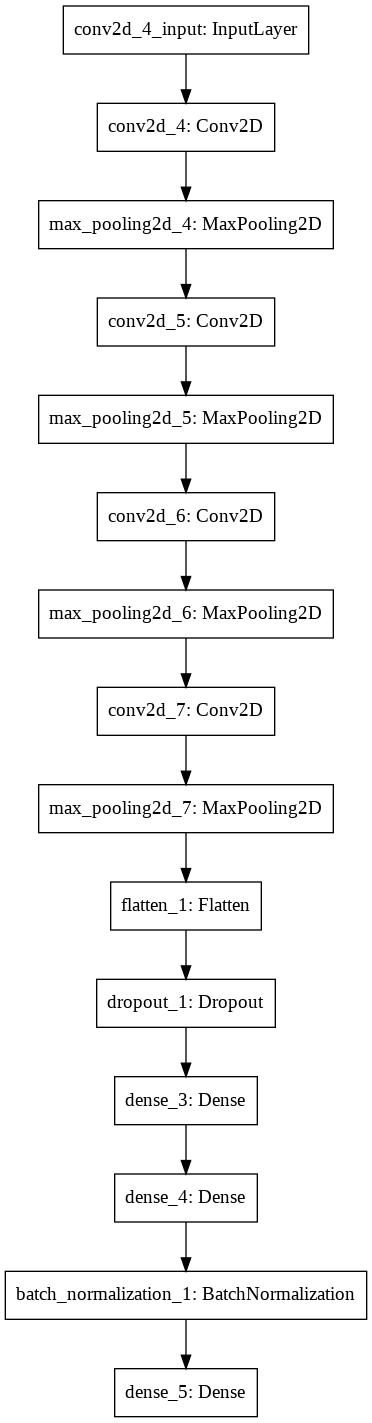

In [ ]:
# Import required keras classes for running the CNN
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.utils.vis_utils import plot_model
from keras import callbacks
from keras.layers import BatchNormalization


# Running the actual CNN
#Create a sequential model
model_CNN= models.Sequential()

#Conv Layer 1
model_CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape))
model_CNN.add(layers.MaxPooling2D((2, 2)))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Conv Layer 2
model_CNN.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Conv Layer 3
model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Conv Layer 4
model_CNN.add(layers.Conv2D(256, (6, 6), activation='relu'))
model_CNN.add(layers.MaxPooling2D((2, 2)))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_first'))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Conv Layer 4
#model_CNN.add(layers.Conv2D(512, (3, 3), activation='relu'))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Conv Layer 4
#model_CNN.add(layers.Conv2D(1024, (5, 5), activation='relu'))
#model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last'))

#Flatten Layer
model_CNN.add(layers.Flatten())

#Loss function
model_CNN.add(layers.Dropout(0.35)) #For regularization (to reduce overfitting)
model_CNN.add(layers.Dense(2048, activation='relu'))
model_CNN.add(layers.Dense(1024, activation='relu'))
model_CNN.add(BatchNormalization())
model_CNN.add(layers.Dense(num_classes, activation='softmax')) #For binary classification



# Define our custom loss function
#def focal_loss(y_true, y_pred):
#    gamma=2
#    alpha = 0.25
#    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
#    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
#    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))



model_CNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(lr=5e-4), metrics=['acc'])
#model_CNN.compile(loss=[focal_loss], optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])
#model_CNN.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=optimizers.Adam(lr=1e-4))
#model_CNN.compile(loss=focal_loss(alpha=1), optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])

model_CNN.summary()

#import tensorflow as tf
#resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
#tf.config.experimental_connect_to_cluster(resolver)
#tf.tpu.experimental.initialize_tpu_system(resolver)
#strategy = tf.distribute.experimental.TPUStrategy(resolver)

#with strategy.scope():
#  model_CNN.compile(loss=[focal_loss], optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])


# To save picture of flowchart of model to drive 
plot_model(model_CNN, to_file='/content/drive/My Drive/Classification-ML/model_plots/2_layer_model_CNN_multiclass.png')

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(labels_train),
                                                 labels_train)
class_weights = {i : class_weights[i] for i in range(3)}

# Loading TensorBoard in Notebook
logdir= os.path.join("/content/drive/My Drive/Classification-ML/nparrays_tensor_board", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=logdir)

#%load_ext tensorboard
#%load_ext tensorboard
#%tensorboard --logdir "/content/drive/My Drive/Classification-ML/nparrays_tensor_board"


# Fitting and saving model for data
history = model_CNN.fit(images_train, labels_train, validation_data=(images_val, labels_val), epochs= 17, batch_size=256, callbacks=[tensorboard_callback], class_weight=class_weights)
#history = model_CNN.fit(images_train, labels_train, validation_split=0.2, epochs= 100, batch_size=30, callbacks=[tensorboard_callback])

# Printing average loss and accuracy values
print("Average validation loss: ", np.average(history.history['val_loss']))
print("Average validation accuracy: ", np.average(history.history['val_acc']))

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/17
46/46 [==============================] - 5s 85ms/step - loss: 0.3702 - acc: 0.8368 - val_loss: 3.8761 - val_acc: 0.5700
Epoch 2/17
46/46 [==============================] - 3s 70ms/step - loss: 0.1685 - acc: 0.9278 - val_loss: 5.7195 - val_acc: 0.2145
Epoch 3/17
46/46 [==============================] - 3s 70ms/step - loss: 0.1623 - acc: 0.9314 - val_loss: 5.7971 - val_acc: 0.4874
Epoch 4/17
46/46 [==============================] - 3s 69ms/step - loss: 0.1551 - acc: 0.9342 - val_loss: 0.4601 - val_acc: 0.8242
Epoch 5/17
46/46 [==============================] - 3s 69ms/step - loss: 0.1312 - acc: 0.9462 - val_loss: 0.9054 - val_acc: 0.6473
Epoch 6/17
46/46 [==============================] - 3s 72ms/step - loss: 0.1183 - acc: 0.9557 - val_loss: 0.3418 - val_acc: 0.8705
Epoch 7/17
46/46 [==============================] - 3s 72ms/step - loss: 0.1012 - acc: 0.9638 - val_loss: 0.2089 - val_acc: 0.9116
Epoch 8/17
 7/46 [===>..........................] - ETA: 2s - loss: 0.0809 - acc: 0

KeyboardInterrupt: ignored

In [ ]:
# Predicting classes for validation set
prediction_classes= np.argmax(model_CNN.predict(images_val, batch_size=30, verbose=0, steps=None, callbacks=[tensorboard_callback]), axis=-1)

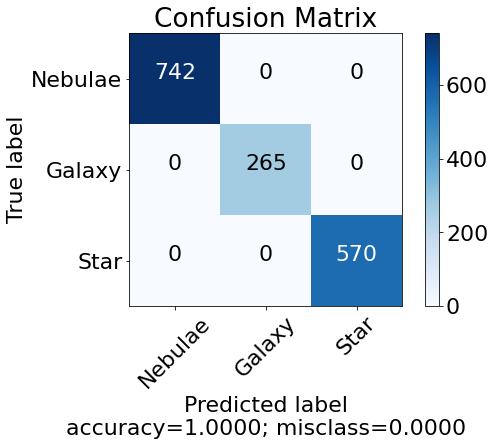

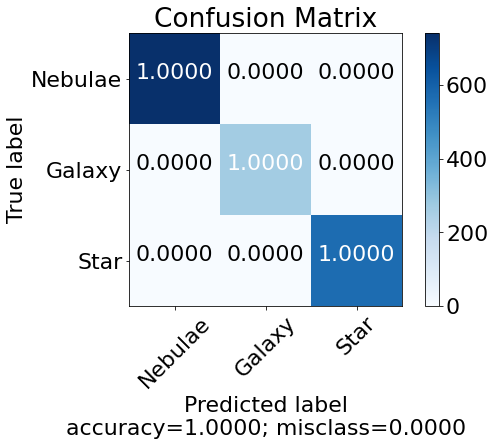

132/132 [==============================] - 1s 5ms/step - loss: 0.0131 - acc: 0.9987
Loss = 0.01311360951513052
Test Accuracy = 0.9987316131591797
acc: 99.87%
Saved model to disk


In [ ]:
# Creating confusion matrix
length= len(prediction_classes)
labels_val_resized= np.reshape(labels_val,(length, 1)) # converting the 1D labels_test[] array to a 2D array, to make it the same shape as predictions[]
cm= confusion_matrix(labels_val_resized, prediction_classes)

# Plotting the confusion matrix and normalized confusion matrix
# taken from https://www.kaggle.com/grfiv4/plot-a-confusion-matrix

import itertools

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.rcParams.update({'font.size': 22})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    

 #running the function
plot_confusion_matrix(cm = cm, normalize = False, target_names = ['Nebulae', 'Galaxy', 'Star'], title = "Confusion Matrix")
plot_confusion_matrix(cm = cm, normalize = True, target_names = ['Nebulae', 'Galaxy', 'Star'], title = "Confusion Matrix")


# Evaluating accuracy and loss on the test set
results = model_CNN.evaluate(images_test, labels_test, batch_size=30, verbose=1)
loss = float(results[0])
accuracy = float(results[1])
print("Loss = " + str(loss))
print("Test Accuracy = " + str(accuracy))


# Saving model in JSON format to Drive 
# taken from https://machinelearningmastery.com/save-load-keras-deep-learning-models/
from keras.models import model_from_json

# evaluate the model
scores = model_CNN.evaluate(images_test, labels_test, verbose=0)
print("%s: %.2f%%" % (model_CNN.metrics_names[1], scores[1]*100))
 
# serialize model to JSON
model_json = model_CNN.to_json()
with open("/content/drive/My Drive/Classification-ML/JSON_files/model_multiclass2.json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
model_CNN.save_weights("/content/drive/My Drive/Classification-ML/JSON_files/model_multiclass2.h5")
print("Saved model to disk")

# later...
 
# load json and create model
json_file = open('/content/drive/My Drive/Classification-ML/JSON_files/model_multiclass2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

Loaded model from disk
These images are labelled as galaxies but predicted as nebulae:


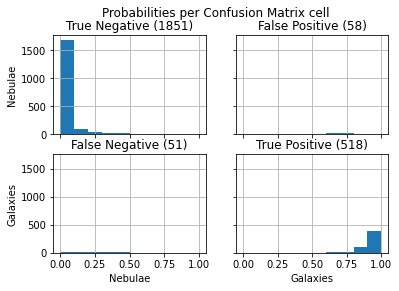

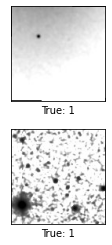

These images are labelled as nebulae but predicted as galaxies:


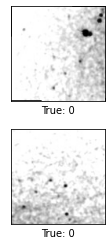

In [ ]:
"""loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/Classification-ML/JSON_files/model_multiclass2.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = model_CNN.evaluate(images_test, labels_test, verbose=0)
#print("loaded_model.metrics_names[1]: ", loaded_model.metrics_names)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


# Predicting probabilities for each of the values in the test set
length= len(images_test)
probs = model_CNN.predict(images_test)
probs_reshaped= np.reshape(probs,(length))

# Making an array to index probabilities in the pandas Dataframe, to then plot histograms for the confusion matrix values
index= np.arange(length)

# Plotting histograms for all four confusion matrix options (TP, TN, FP, FN)
# taken from https://github.com/DistrictDataLabs/yellowbrick/issues/749
import pandas as pd

df_predictions = pd.DataFrame({'label': labels_test, 'probs': probs_reshaped, 'index': index})

fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None, autoscale=False):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
    if(autoscale==True):
        pass    
        #ax.set_ylim([0,50])
    else:
        pass
        #plt.show()

show_quarter(df_predictions, "label==0 and probs < 0.5", "probs", "True Negative", axs[0][0], bins, y_label="Nebulae")
show_quarter(df_predictions, "label==0 and probs >= 0.5", "probs", "False Positive", axs[0][1], bins, autoscale=True)
show_quarter(df_predictions, "label==1 and probs >= 0.5", "probs", "True Positive", axs[1][1], bins, x_label="Galaxies")
show_quarter(df_predictions, "label==1 and probs < 0.5", "probs", "False Negative", axs[1][0], bins, x_label="Nebulae", y_label="Galaxies", autoscale=True)
fig.suptitle("Probabilities per Confusion Matrix cell");


# Finding extreme outliers
query= "label==1 and probs<=0.3"
results = df_predictions.query(query)
galaxy_outliers= results['index'].values
galaxy_outliers_len= len(galaxy_outliers)
#print("real_outliers: ", real_outliers)

query= "label==0 and probs>=0.7"
results = df_predictions.query(query)
nebulae_outliers= results['index'].values
nebulae_outliers_len= len(nebulae_outliers)
#print("bogus_outliers: ", bogus_outliers)


# Plotting images of 4 extreme outliers (TN and FP)
def plot_images_outliers(images, cls_true, cls_pred=None):
    
    """"""print('length of images: '+str(len(images)))
    print('length of cls: '+str(len(cls_true)))""""""

    assert len(images) == len(cls_true)

    """"""# Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(2,2)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)""""""

    if cls_pred is None:
      fig, axes = plt.subplots(2,1)
      fig.subplots_adjust(hspace=0.3, wspace=0.3)

      for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape))#, cmap='binary')

        # Show true and predicted classes.
        xlabel = "True: {0}".format(cls_true[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    else:
      fig, axes = plt.subplots(2,2)
      fig.subplots_adjust(hspace=0.3, wspace=0.3)

      for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape))#, cmap='binary')

        # Show true and predicted classes.
        xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
    
# Running the above plotting function
print("These images are labelled as galaxies but predicted as nebulae:")

galaxy_images= []
galaxy_labels= np.full((galaxy_outliers_len), 1)
for i in galaxy_outliers:
    img= images_test[i-1]
    galaxy_images.append(img)

#print("REAL IMAGES: ", real_images)

plot_images_outliers(images=galaxy_images, cls_true=galaxy_labels)
#plot_images_individual(images=real_images[4:5], cls_true=real_labels[4:5])


print("These images are labelled as nebulae but predicted as galaxies:")

nebulae_images= []
nebulae_labels= np.full(nebulae_outliers_len, 0)  
for i in nebulae_outliers:
    img= images_test[i-1]
    nebulae_images.append(img)
    
plot_images_outliers(images=nebulae_images, cls_true=nebulae_labels)"""

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score
from sklearn.metrics import cohen_kappa_score

print('precision score: ', precision_score(labels_val_resized, prediction_classes, average='macro'))
print('recall score: ', recall_score(labels_val_resized, prediction_classes, average='macro'))
print('f1 score: ', f1_score(labels_val_resized, prediction_classes, average='macro'))
print('f1 score: ', f1_score(labels_val_resized, prediction_classes, average='macro'))
print('Matthews Correlation Coefficient: ', matthews_corrcoef(labels_val_resized, prediction_classes))
print('Cohen Kappa Score: ', cohen_kappa_score(labels_val_resized, prediction_classes))

precision score:  1.0
recall score:  1.0
f1 score:  1.0
f1 score:  1.0
Matthews Correlation Coefficient:  1.0
Cohen Kappa Score:  1.0
